<a href="https://colab.research.google.com/github/itsapoorvj/STOCK-PRICE-DIRECTION/blob/main/Btech_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ta

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=cde4094f1b467cf05e270598f276ca17936f8b542fe04635337d5442b86ea026
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd
import os
import sys
import re
import collections
import datetime
import math
import threading

import cvxopt
import cvxopt.blas
import cvxopt.solvers

from statistics import variance

import matplotlib.pyplot as pyplot
from heapq import nlargest

In [ ]:
# importing the required indicators
from ta.trend import ADXIndicator
from ta.trend import PSARIndicator
from ta.momentum import RSIIndicator
from ta.momentum import StochasticOscillator
from ta.trend import MACD
from ta.momentum import TSIIndicator
from ta.trend import CCIIndicator
from ta.volatility import BollingerBands
from ta.volatility import AverageTrueRange
from ta.momentum import KAMAIndicator
from ta.momentum import ao
from ta.volume import EaseOfMovementIndicator
from ta.volume import OnBalanceVolumeIndicator
from ta.others import DailyReturnIndicator
from ta.others import CumulativeReturnIndicator
from ta.volume import ForceIndexIndicator



In [ ]:
#adding libraries for data training
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import Counter

from operator import itemgetter
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [ ]:
# Import the Python machine learning libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pulling the data and converting it to dataframe
data = pd.ExcelFile("/content/drive/My Drive/Btech_project_data/Nifty50_Data.xlsx")
tickerlist = data.sheet_names
ticker = []
for i in tickerlist:
  ticker.append(pd.read_excel(data,i))
len(tickerlist)
print(tickerlist)

['ACC.NS', 'ABBOTINDIA.NS', 'ADANIGREEN.NS', 'ADANITRANS.NS', 'ALKEM.NS', 'AMBUJACEM.NS', 'AUROPHARMA.NS', 'DMART.NS', 'BAJAJHLDNG.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'BERGEPAINT.NS', 'INFRATEL.NS', 'BIOCON.NS', 'BOSCHLTD.NS', 'CADILAHC.NS', 'COLPAL.NS', 'CONCOR.NS', 'DLF.NS', 'DABUR.NS', 'GICRE.NS', 'GODREJCP.NS', 'HDFCAMC.NS', 'HAVELLS.NS', 'HINDPETRO.NS', 'HINDZINC.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 'IGL.NS', 'NAUKRI.NS', 'INDIGO.NS', 'LTI.NS', 'LUPIN.NS', 'MARICO.NS', 'MOTHERSUMI.NS', 'MUTHOOTFIN.NS', 'NMDC.NS', 'OFSS.NS', 'PETRONET.NS', 'PIDILITIND.NS', 'PEL.NS', 'PFC.NS', 'PGHH.NS', 'PNB.NS', 'SBICARD.NS', 'SIEMENS.NS', 'TATACONSUM.NS', 'TORNTPHARM.NS', 'UBL.NS', 'MCDOWELL-N.NS']


In [ ]:
#generating output 
for count,i in enumerate(ticker):
  df=i
  signal =[]
  l = len(df.index)
  for row in range(l-1):
     
    if df.at[row+1, 'Adj Close']>1.5+df.at[row, 'Adj Close']:
      signal.append('Buy')
    elif df.at[row+1, 'Adj Close']<df.at[row, 'Adj Close']-1.5:
      signal.append('Sell') 
    else:
      signal.append('Hold') 
  signal.append('Hold')
  df["Sign"]=signal


In [ ]:
#adding adjusted prices
for count,i in enumerate(ticker):
  df=i
  df['Adj Open'] = df['Open'] * df['Adj Close']/df['Close']
  df['Adj High'] = df['High'] * df['Adj Close']/df['Close']
  df['Adj Low'] = df['Low'] * df['Adj Close']/df['Close']
  df.dropna(inplace=True)

In [ ]:
#adding indicator's values as features into our dataset
#adding SMA
for count,i in enumerate(ticker):
  df=i
  SMA = df['Adj Close'].rolling(window=20).mean()
  df["SMA"]=SMA

In [ ]:
#adding EMA
for count,i in enumerate(ticker):
  df=i
  EMA = df['Adj Close'].ewm(span=20, adjust=False).mean()
  df["EMA"] = EMA

In [ ]:
#adding ADXindicator
for count,i in enumerate(ticker):
  df=i
  adxI = ADXIndicator(df['Adj High'],df['Adj Low'],df['Adj Close'],14,False)
  df['ADX'] = adxI.adx()

/usr/local/lib/python3.6/dist-packages/ta/trend.py:643: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:647: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:643: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:647: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:643: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:647: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])
/usr/local/lib/python3.6/dist-pack

In [ ]:
#adding psar
for count,i in enumerate(ticker):
  df=i
  psarI = PSARIndicator(df['Adj High'],df['Adj Low'],df['Adj Close'],0.02,0.2,False)
  df['PSAR'] = psarI.psar()

In [ ]:
#adding WMA
for count,i in enumerate(ticker):
  df=i
  weights = np.arange(1,21)
  wma20 = df['Adj Close'].rolling(20).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
  df['WMA'] = wma20

In [ ]:
#adding MACD
for count,i in enumerate(ticker):
  df=i
  macdI = MACD(df['Adj Close'],26,12,9,False)
  df['MACD'] = macdI.macd()

In [ ]:
#adding CCI 
for count,i in enumerate(ticker):
  df=i
  CCI_i = CCIIndicator(df['High'],df['Low'],df['Close'],20,0.015,False)
  df['CCI'] = CCI_i.cci()

In [ ]:
#adding RSI
for count,i in enumerate(ticker):
  df=i
  rsiI = RSIIndicator(df['Adj Close'],14,False)
  df['RSI'] = rsiI.rsi()

In [ ]:
#adding Stochastic Oscillator
for count,i in enumerate(ticker):
  df=i
  StochasticI = StochasticOscillator(df['Adj High'],df['Adj Low'],df['Adj Close'],14,3,False)
  df['Stochastic'] = StochasticI.stoch()

In [ ]:
#adding TSI
for count,i in enumerate(ticker):
  df=i
  TSI = TSIIndicator(df['Adj Close'],25,13,False)
  df['TSI'] = TSI.tsi()

In [ ]:
#adding bollinger bands
for count,i in enumerate(ticker):
  df=i
  BB = BollingerBands(df['Adj Close'],20,2,False)
  df['BB_High'] = BB.bollinger_hband() 
  df['BB_Low'] = BB.bollinger_lband()
  df['BB_Avg'] = BB.bollinger_mavg() 

In [ ]:
#adding ATR
for count,i in enumerate(ticker):
  df=i
  ATR_i = AverageTrueRange(df['Adj High'],df['Adj Low'],df['Adj Close'],14,False)
  df['ATR'] = ATR_i.average_true_range()

In [ ]:
#adding KAMA
for count,i in enumerate(ticker):
  df=i
  KAMA_i = KAMAIndicator(df['Adj Close'],25,13,False)
  df['KAMA'] = KAMA_i.kama()

In [ ]:
#adding Awesomne Oscillator
for count,i in enumerate(ticker):
  df=i
  AO_i = ao(df['Adj High'],df['Adj Low'],5,34,False)
  df['AO'] = AO_i

In [ ]:
# adding EMV
for count,i in enumerate(ticker):
  df=i
  EMV_i = EaseOfMovementIndicator(df['Adj High'],df['Adj Low'],df['Volume'],14,False)
  df['EMV'] = EMV_i.ease_of_movement()

In [ ]:
#addng obv
for count,i in enumerate(ticker):
  df=i
  OBV_i = OnBalanceVolumeIndicator(df['Adj Close'],df['Volume'],False)
  df['OBV'] = OBV_i.on_balance_volume()

In [ ]:
#adding cr
for count,i in enumerate(ticker):
  df=i
  CR_i = CumulativeReturnIndicator(df['Adj Close'],False)
  df['CR'] = CR_i.cumulative_return()

In [ ]:
#adding dr
for count,i in enumerate(ticker):
  df=i
  DR_i = DailyReturnIndicator(df['Adj Close'],False)
  df['DR'] = DR_i.daily_return()

In [ ]:
#adding FI
for count,i in enumerate(ticker):
  df=i
  FI_i = ForceIndexIndicator(df['Adj Close'],df['Volume'],13,False)
  df['FI'] = FI_i.force_index()

In [ ]:
#data preprocessing
for i in ticker:
  i.drop(columns=['Date'],inplace=True)
  i.drop(i.loc[0:36].index, inplace=True)

In [ ]:
# for data,name in zip(ticker, tickerlist):
#   df=data
#   df.to_excel('btp_output.xlsx', sheet_name=name)

# writer = pd.ExcelWriter('BTP_output.xlsx')
# for i, df in zip(tickerlist, ticker):
#     df.to_excel(writer, index=False,sheet_name=i)
    
# writer.save()

In [ ]:
#data = pd.ExcelFile("/content/drive/My Drive/Btech_project_data/BTP_output.xlsx")

In [ ]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print(ticker[0].head())


           High          Low         Open        Close  Volume    Adj Close  \
37  1364.250000  1347.150024  1349.000000  1357.900024  146576  1236.980591   
38  1373.150024  1355.000000  1362.500000  1359.849976  152678  1238.756958   
39  1363.300049  1348.349976  1356.000000  1350.099976  159876  1229.875122   
40  1342.650024  1332.300049  1340.000000  1334.849976  228456  1215.983032   
41  1355.949951  1335.500000  1336.449951  1353.449951  150373  1232.927002   

    Sign     Adj Open     Adj High      Adj Low          SMA          EMA  \
37   Buy  1228.873103  1242.765108  1227.187866  1236.748376  1233.709364   
38  Sell  1241.171001  1250.872653  1234.338867  1235.848810  1234.190087   
39  Sell  1235.249756  1241.899744  1228.280958  1233.648846  1233.779138   
40   Buy  1220.674453  1223.088495  1213.660174  1229.501733  1232.084271   
41  Sell  1217.440830  1235.204380  1216.575470  1227.121875  1232.164531   

          ADX         PSAR          WMA      MACD        CCI  

In [ ]:
#Calculating average accuracy for indicators
momentum_acc_avg = {}
momentum_acc_min = {}
momentum_acc_max = {}
trend_acc_avg = {}
trend_acc_min = {}
trend_acc_max = {}
volume_acc_avg = {}
volume_acc_min = {}
volume_acc_max = {}

In [ ]:
#Calculating prediction accuracy for SMA
accuracy_SMA = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','SMA']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_SMA.append(accuracy_score(Y_test, predictions_dt))
trend_acc_avg['SMA'] = np.average(accuracy_SMA)
trend_acc_min['SMA'] = np.min(accuracy_SMA)
trend_acc_max['SMA'] = np.max(accuracy_SMA)


DecisionTreeClassifier 0.44972067039106145
DecisionTreeClassifier 0.4581005586592179
DecisionTreeClassifier 0.5316455696202531
DecisionTreeClassifier 0.4720670391061452
DecisionTreeClassifier 0.43859649122807015
DecisionTreeClassifier 0.35195530726256985
DecisionTreeClassifier 0.36312849162011174
DecisionTreeClassifier 0.4581673306772908
DecisionTreeClassifier 0.44692737430167595
DecisionTreeClassifier 0.38857142857142857
DecisionTreeClassifier 0.40502793296089384
DecisionTreeClassifier 0.3435754189944134
DecisionTreeClassifier 0.36312849162011174
DecisionTreeClassifier 0.36033519553072624
DecisionTreeClassifier 0.4776536312849162
DecisionTreeClassifier 0.34916201117318435
DecisionTreeClassifier 0.43575418994413406
DecisionTreeClassifier 0.3854748603351955
DecisionTreeClassifier 0.34916201117318435
DecisionTreeClassifier 0.3770949720670391
DecisionTreeClassifier 0.3864734299516908
DecisionTreeClassifier 0.39106145251396646
DecisionTreeClassifier 0.41216216216216217
DecisionTreeClassifi

In [ ]:
#Calculating prediction accuracy for EMA
accuracy_EMA = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','EMA']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_EMA.append(accuracy_score(Y_test, predictions_dt))
trend_acc_avg['EMA'] = np.average(accuracy_EMA)
trend_acc_min['EMA'] = np.min(accuracy_EMA)
trend_acc_max['EMA'] = np.max(accuracy_EMA)

DecisionTreeClassifier 0.4273743016759777
DecisionTreeClassifier 0.48044692737430167
DecisionTreeClassifier 0.5
DecisionTreeClassifier 0.4692737430167598
DecisionTreeClassifier 0.4853801169590643
DecisionTreeClassifier 0.3240223463687151
DecisionTreeClassifier 0.37988826815642457
DecisionTreeClassifier 0.450199203187251
DecisionTreeClassifier 0.441340782122905
DecisionTreeClassifier 0.4057142857142857
DecisionTreeClassifier 0.39385474860335196
DecisionTreeClassifier 0.3324022346368715
DecisionTreeClassifier 0.36033519553072624
DecisionTreeClassifier 0.36312849162011174
DecisionTreeClassifier 0.5027932960893855
DecisionTreeClassifier 0.3240223463687151
DecisionTreeClassifier 0.4106145251396648
DecisionTreeClassifier 0.3268156424581006
DecisionTreeClassifier 0.37988826815642457
DecisionTreeClassifier 0.3575418994413408
DecisionTreeClassifier 0.42028985507246375
DecisionTreeClassifier 0.39385474860335196
DecisionTreeClassifier 0.44594594594594594
DecisionTreeClassifier 0.36312849162011174

In [ ]:
#Calculating prediction accuracy for WMA
accuracy_WMA = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','WMA']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_WMA.append(accuracy_score(Y_test, predictions_dt))
trend_acc_avg['WMA'] = np.average(accuracy_WMA)
trend_acc_min['WMA'] = np.min(accuracy_WMA)
trend_acc_max['WMA'] = np.max(accuracy_WMA)

In [ ]:
#Calculating prediction accuracy for ADX
accuracy_ADX = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','ADX']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_ADX.append(accuracy_score(Y_test, predictions_dt))
trend_acc_avg['ADX'] = np.average(accuracy_ADX)
trend_acc_min['ADX'] = np.min(accuracy_ADX)
trend_acc_max['ADX'] = np.max(accuracy_ADX)

In [ ]:
#Calculating prediction accuracy for PSAR
accuracy_PSAR = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','PSAR']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_PSAR.append(accuracy_score(Y_test, predictions_dt))
trend_acc_avg['PSAR'] = np.average(accuracy_PSAR)
trend_acc_min['PSAR'] = np.min(accuracy_PSAR)
trend_acc_max['PSAR'] = np.max(accuracy_PSAR)

DecisionTreeClassifier 0.4888268156424581
DecisionTreeClassifier 0.4972067039106145
DecisionTreeClassifier 0.5253164556962026
DecisionTreeClassifier 0.49441340782122906
DecisionTreeClassifier 0.4239766081871345
DecisionTreeClassifier 0.3128491620111732
DecisionTreeClassifier 0.3687150837988827
DecisionTreeClassifier 0.4701195219123506
DecisionTreeClassifier 0.42178770949720673
DecisionTreeClassifier 0.3942857142857143
DecisionTreeClassifier 0.3324022346368715
DecisionTreeClassifier 0.3128491620111732
DecisionTreeClassifier 0.3687150837988827
DecisionTreeClassifier 0.3743016759776536
DecisionTreeClassifier 0.4776536312849162
DecisionTreeClassifier 0.33519553072625696
DecisionTreeClassifier 0.441340782122905
DecisionTreeClassifier 0.3407821229050279
DecisionTreeClassifier 0.3659217877094972
DecisionTreeClassifier 0.329608938547486
DecisionTreeClassifier 0.4057971014492754
DecisionTreeClassifier 0.42178770949720673
DecisionTreeClassifier 0.4189189189189189
DecisionTreeClassifier 0.4245810

In [ ]:
#Calculating prediction accuracy for MACD
accuracy_MACD = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','MACD']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_MACD.append(accuracy_score(Y_test, predictions_dt))
trend_acc_avg['MACD'] = np.average(accuracy_MACD)
trend_acc_min['MACD'] = np.min(accuracy_MACD)
trend_acc_max['MACD'] = np.max(accuracy_MACD)

In [ ]:
#Calculating prediction accuracy for MACD
accuracy_CCI = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','CCI']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_CCI.append(accuracy_score(Y_test, predictions_dt))
trend_acc_avg['CCI'] = np.average(accuracy_CCI)
trend_acc_min['CCI'] = np.min(accuracy_CCI)
trend_acc_max['CCI'] = np.max(accuracy_CCI)

In [ ]:
print(trend_acc_avg['SMA'])
print(trend_acc_avg['EMA'])
print(trend_acc_avg['WMA'])
print(trend_acc_avg['ADX'])
print(trend_acc_avg['PSAR'])
print(trend_acc_avg['MACD'])
print(trend_acc_avg['CCI'])

0.4099551872081723
0.40730793346447575
0.408245857790596
0.41345331495968074
0.4042154909014264
0.40708335448652144
0.4090342213169956


In [ ]:
print(trend_acc_min['SMA'])
print(trend_acc_min['EMA'])
print(trend_acc_min['WMA'])
print(trend_acc_min['ADX'])
print(trend_acc_min['PSAR'])
print(trend_acc_min['MACD'])
print(trend_acc_min['CCI'])

0.30726256983240224
0.2988826815642458
0.3100558659217877
0.329608938547486
0.3225806451612903
0.3225806451612903
0.32905982905982906


In [ ]:
print(trend_acc_max['SMA'])
print(trend_acc_max['EMA'])
print(trend_acc_max['WMA'])
print(trend_acc_max['ADX'])
print(trend_acc_max['PSAR'])
print(trend_acc_max['MACD'])
print(trend_acc_max['CCI'])

0.5111731843575419
0.5161290322580645
0.5335195530726257
0.5675675675675675
0.569620253164557
0.5253164556962026
0.48324022346368717


In [ ]:
#Calculating prediction accuracy for RSI
accuracy_RSI = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','RSI']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_RSI.append(accuracy_score(Y_test, predictions_dt))
momentum_acc_avg['RSI'] = np.average(accuracy_RSI)
momentum_acc_min['RSI'] = np.min(accuracy_RSI)
momentum_acc_max['RSI'] = np.max(accuracy_RSI)

In [ ]:
#Calculating prediction accuracy for Stochastic
accuracy_Stochastic = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','Stochastic']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_Stochastic.append(accuracy_score(Y_test, predictions_dt))
momentum_acc_avg['Stochastic'] = np.average(accuracy_Stochastic)
momentum_acc_min['Stochastic'] = np.min(accuracy_Stochastic)
momentum_acc_max['Stochastic'] = np.max(accuracy_Stochastic)

In [ ]:
#Calculating prediction accuracy for ATR
accuracy_ATR = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','ATR']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_ATR.append(accuracy_score(Y_test, predictions_dt))
momentum_acc_avg['ATR'] = np.average(accuracy_ATR)
momentum_acc_min['ATR'] = np.min(accuracy_ATR)
momentum_acc_max['ATR'] = np.max(accuracy_ATR)

In [ ]:
#Calculating prediction accuracy for TSI
accuracy_TSI = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','TSI']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_TSI.append(accuracy_score(Y_test, predictions_dt))
momentum_acc_avg['TSI'] = np.average(accuracy_TSI)
momentum_acc_min['TSI'] = np.min(accuracy_TSI)
momentum_acc_max['TSI'] = np.max(accuracy_TSI)

In [ ]:
#Calculating prediction accuracy for KAMA
accuracy_KAMA = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','KAMA']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_KAMA.append(accuracy_score(Y_test, predictions_dt))
momentum_acc_avg['KAMA'] = np.average(accuracy_KAMA)
momentum_acc_min['KAMA'] = np.min(accuracy_KAMA)
momentum_acc_max['KAMA'] = np.max(accuracy_KAMA)

In [ ]:
#Calculating prediction accuracy for BB
accuracy_BB = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','BB_High','BB_Low','BB_Avg']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_BB.append(accuracy_score(Y_test, predictions_dt))
momentum_acc_avg['BB'] = np.average(accuracy_BB)
momentum_acc_min['BB'] = np.min(accuracy_BB)
momentum_acc_max['BB'] = np.max(accuracy_BB)

In [ ]:
#Calculating prediction accuracy for AO
accuracy_AO = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','AO']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_AO.append(accuracy_score(Y_test, predictions_dt))
momentum_acc_avg['AO'] = np.average(accuracy_AO)
momentum_acc_min['AO'] = np.min(accuracy_AO)
momentum_acc_max['AO'] = np.max(accuracy_AO)

In [ ]:
print(momentum_acc_avg['RSI'])
print(momentum_acc_avg['Stochastic'])
print(momentum_acc_avg['ATR'])
print(momentum_acc_avg['TSI'])
print(momentum_acc_avg['KAMA'])
print(momentum_acc_avg['BB'])
print(momentum_acc_avg['AO'])

0.4096365282022179
0.4038626965397314
0.41257284146895
0.40815641896026017
0.4013698772130261
0.4101330108594954
0.4131525593094551


In [ ]:
print(momentum_acc_max['RSI'])
print(momentum_acc_max['Stochastic'])
print(momentum_acc_max['ATR'])
print(momentum_acc_max['TSI'])
print(momentum_acc_max['KAMA'])
print(momentum_acc_max['BB'])
print(momentum_acc_max['AO'])

0.5569620253164557
0.5569620253164557
0.5195530726256983
0.5253164556962026
0.5223463687150838
0.5253164556962026
0.569620253164557


In [ ]:
print(momentum_acc_min['RSI'])
print(momentum_acc_min['Stochastic'])
print(momentum_acc_min['ATR'])
print(momentum_acc_min['TSI'])
print(momentum_acc_min['KAMA'])
print(momentum_acc_min['BB'])
print(momentum_acc_min['AO'])

0.2903225806451613
0.25806451612903225
0.3128491620111732
0.3225806451612903
0.2903225806451613
0.2988826815642458
0.3268156424581006


In [ ]:
#Calculating prediction accuracy for EMV
accuracy_EMV = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','EMV']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_EMV.append(accuracy_score(Y_test, predictions_dt))
volume_acc_avg['EMV'] = np.average(accuracy_EMV)
volume_acc_min['EMV'] = np.min(accuracy_EMV)
volume_acc_max['EMV'] = np.max(accuracy_EMV)

In [ ]:
#Calculating prediction accuracy for OBV
accuracy_OBV = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','OBV']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_OBV.append(accuracy_score(Y_test, predictions_dt))
volume_acc_avg['OBV'] = np.average(accuracy_OBV)
volume_acc_min['OBV'] = np.min(accuracy_OBV)
volume_acc_max['OBV'] = np.max(accuracy_OBV)

In [ ]:
#Calculating prediction accuracy for CR
accuracy_CR = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','CR']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_CR.append(accuracy_score(Y_test, predictions_dt))
volume_acc_avg['CR'] = np.average(accuracy_CR)
volume_acc_min['CR'] = np.min(accuracy_CR)
volume_acc_max['CR'] = np.max(accuracy_CR)

In [ ]:
#Calculating prediction accuracy for DR
accuracy_DR = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','DR']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_DR.append(accuracy_score(Y_test, predictions_dt))
volume_acc_avg['DR'] = np.average(accuracy_DR)
volume_acc_min['DR'] = np.min(accuracy_DR)
volume_acc_max['DR'] = np.max(accuracy_DR)

In [ ]:
#Calculating prediction accuracy for FI
accuracy_FI = []
for i in ticker:
  y = i['Sign']
  x = i[['High','Low','Open','Close','Volume','FI']]
  # Rescale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  rescaledx = scaler.fit_transform(x)

  # Convert X back to a Pandas DataFrame, for convenience
  x = pd.DataFrame(rescaledx, columns=x.columns)
  test_size = 0.30
  seed = 1
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  # Build a decision tree model
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train, Y_train)
  # Check the model performance with the test data
  predictions_dt = model_dt.predict(X_test)
  #print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))
  accuracy_FI.append(accuracy_score(Y_test, predictions_dt))
volume_acc_avg['FI'] = np.average(accuracy_FI)
volume_acc_min['FI'] = np.min(accuracy_FI)
volume_acc_max['FI'] = np.max(accuracy_FI)

In [ ]:
print(volume_acc_avg['EMV'])
print(volume_acc_avg['OBV'])
print(volume_acc_avg['CR'])
print(volume_acc_avg['DR'])
print(volume_acc_avg['FI'])

0.4108152547212234
0.41539162872248264
0.40816895530241726
0.3955036221281113
0.40423562186150336


In [ ]:
print(volume_acc_min['EMV'])
print(volume_acc_min['OBV'])
print(volume_acc_min['CR'])
print(volume_acc_min['DR'])
print(volume_acc_min['FI'])

0.33798882681564246
0.31564245810055863
0.25806451612903225
0.3140096618357488
0.3128491620111732


In [ ]:
print(volume_acc_max['EMV'])
print(volume_acc_max['OBV'])
print(volume_acc_max['CR'])
print(volume_acc_max['DR'])
print(volume_acc_max['FI'])

0.5083798882681564
0.5223463687150838
0.5139664804469274
0.5251396648044693
0.5759493670886076


In [ ]:
top_trend_indicators = nlargest(3, trend_acc_avg, key = trend_acc_avg.get)
for i in top_trend_indicators:
  print(i, ":", trend_acc_avg.get(i))


ADX : 0.41345331495968074
SMA : 0.4099551872081723
CCI : 0.4090342213169956


In [ ]:
top_momentum_indicators = nlargest(3, momentum_acc_avg, key = momentum_acc_avg.get)
for i in top_momentum_indicators:
  print(i, ":", momentum_acc_avg.get(i))

AO : 0.4131525593094551
ATR : 0.41257284146895
BB : 0.4101330108594954


In [ ]:
top_volume_indicators = nlargest(3, volume_acc_avg, key = volume_acc_avg.get)
for i in top_volume_indicators:
  print(i, ":", volume_acc_avg.get(i))

OBV : 0.41539162872248264
EMV : 0.4108152547212234
CR : 0.40816895530241726


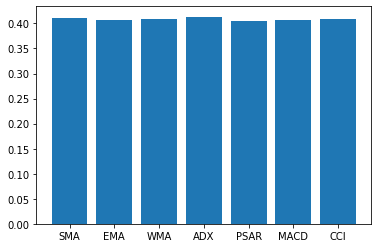

In [ ]:
pyplot.bar(range(len(trend_acc_avg)), list(trend_acc_avg.values()), align='center')
pyplot.xticks(range(len(trend_acc_avg)), list(trend_acc_avg.keys()))

pyplot.show()

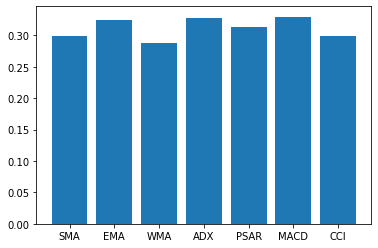

In [ ]:
pyplot.bar(range(len(trend_acc_min)), list(trend_acc_min.values()), align='center')
pyplot.xticks(range(len(trend_acc_min)), list(trend_acc_min.keys()))

pyplot.show()

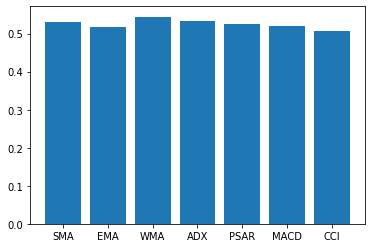

In [ ]:
pyplot.bar(range(len(trend_acc_max)), list(trend_acc_max.values()), align='center')
pyplot.xticks(range(len(trend_acc_max)), list(trend_acc_max.keys()))

pyplot.show()

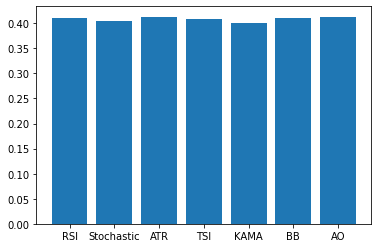

In [ ]:
pyplot.bar(range(len(momentum_acc_avg)), list(momentum_acc_avg.values()), align='center')
pyplot.xticks(range(len(momentum_acc_avg)), list(momentum_acc_avg.keys()))

pyplot.show()

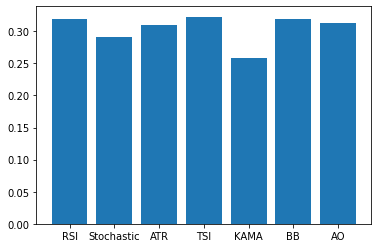

In [ ]:
pyplot.bar(range(len(momentum_acc_min)), list(momentum_acc_min.values()), align='center')
pyplot.xticks(range(len(momentum_acc_min)), list(momentum_acc_min.keys()))

pyplot.show()

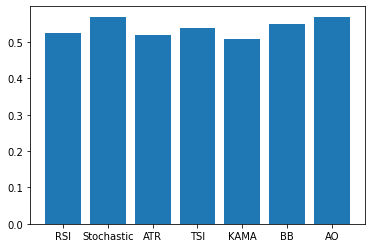

In [ ]:
pyplot.bar(range(len(momentum_acc_max)), list(momentum_acc_max.values()), align='center')
pyplot.xticks(range(len(momentum_acc_max)), list(momentum_acc_max.keys()))

pyplot.show()

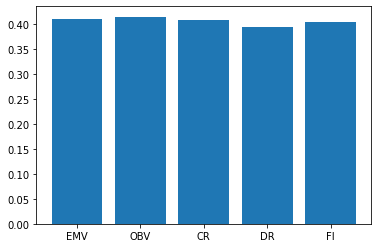

In [ ]:
pyplot.bar(range(len(volume_acc_avg)), list(volume_acc_avg.values()), align='center')
pyplot.xticks(range(len(volume_acc_avg)), list(volume_acc_avg.keys()))

pyplot.show()

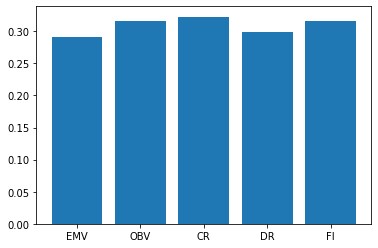

In [ ]:
pyplot.bar(range(len(volume_acc_min)), list(volume_acc_min.values()), align='center')
pyplot.xticks(range(len(volume_acc_min)), list(volume_acc_min.keys()))

pyplot.show()

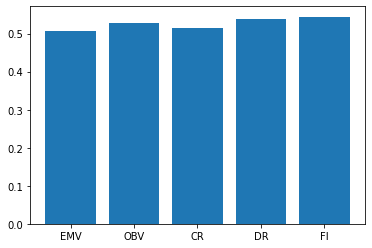

In [ ]:
pyplot.bar(range(len(volume_acc_max)), list(volume_acc_max.values()), align='center')
pyplot.xticks(range(len(volume_acc_max)), list(volume_acc_max.keys()))

pyplot.show()

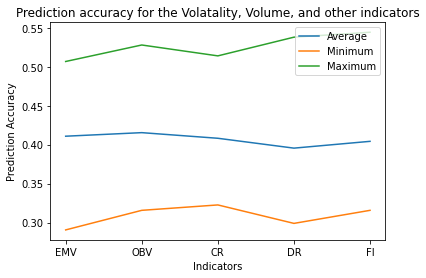

In [ ]:
pyplot.plot(list(volume_acc_avg.keys()),list(volume_acc_avg.values()), label = "Average")
pyplot.plot(list(volume_acc_min.keys()),list(volume_acc_min.values()), label = "Minimum")
pyplot.plot(list(volume_acc_max.keys()),list(volume_acc_max.values()), label = "Maximum")
pyplot.ylabel("Prediction Accuracy")
pyplot.xlabel("Indicators")
pyplot.legend()
pyplot.title("Prediction accuracy for the Volatality, Volume, and other indicators")
pyplot.show()

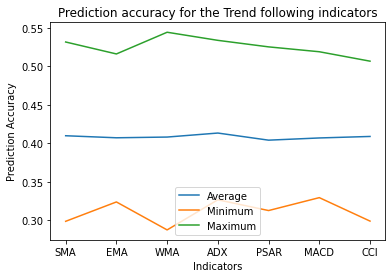

In [ ]:
pyplot.plot(list(trend_acc_avg.keys()),list(trend_acc_avg.values()), label = "Average")
pyplot.plot(list(trend_acc_min.keys()),list(trend_acc_min.values()), label = "Minimum")
pyplot.plot(list(trend_acc_max.keys()),list(trend_acc_max.values()), label = "Maximum")
pyplot.ylabel("Prediction Accuracy")
pyplot.xlabel("Indicators")
pyplot.legend()
pyplot.title("Prediction accuracy for the Trend following indicators")
pyplot.show()

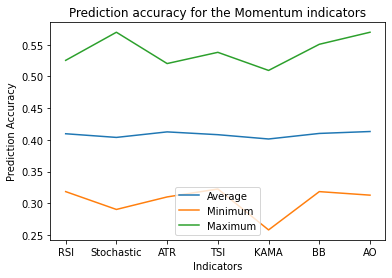

In [ ]:
pyplot.plot(list(momentum_acc_avg.keys()),list(momentum_acc_avg.values()), label = "Average")
pyplot.plot(list(momentum_acc_min.keys()),list(momentum_acc_min.values()), label = "Minimum")
pyplot.plot(list(momentum_acc_max.keys()),list(momentum_acc_max.values()), label = "Maximum")
pyplot.ylabel("Prediction Accuracy")
pyplot.xlabel("Indicators")
pyplot.legend()
pyplot.title("Prediction accuracy for the Momentum indicators")
pyplot.show()